In [ ]:
import requests
import zipfile
import io
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'

response = requests.get(url)
response.raise_for_status()

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('household_power_consumption.txt') as f:
        df = pd.read_csv(f, sep=';', na_values=['?'])

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index('DateTime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.head())
df.info()

                     Global_active_power  Global_reactive_power  Voltage  \
DateTime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

In [ ]:
print("1. Checking for missing values:")
print(df.isnull().sum())

print("\n2. Data types:")
df.info()

print("\n3. Summary statistics:")
print(df.describe())

print("\n4. Filling missing values...")
df.fillna(method='ffill', inplace=True)

if df.isnull().sum().any():
    print("Some values are still missing, filling them with column means...")
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)

print("\n5. Final check for missing values:")
print(df.isnull().sum())

print("Data cleaning and inspection complete.")


1. Checking for missing values:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Hour                     0
DayOfWeek                0
dtype: int64

2. Data types:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Hour                   int32  
 8   DayOfWeek              int32  
dtypes: float64(7), int32(2)
memory usage: 142.5 MB

3. Summary statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count       

/tmp/ipython-input-2764453199.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
print(df.isnull().sum())
df.info()
print(df.describe())
df.ffill(inplace=True)

if df.isnull().sum().any():
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)

print(df.isnull().sum())

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.23998

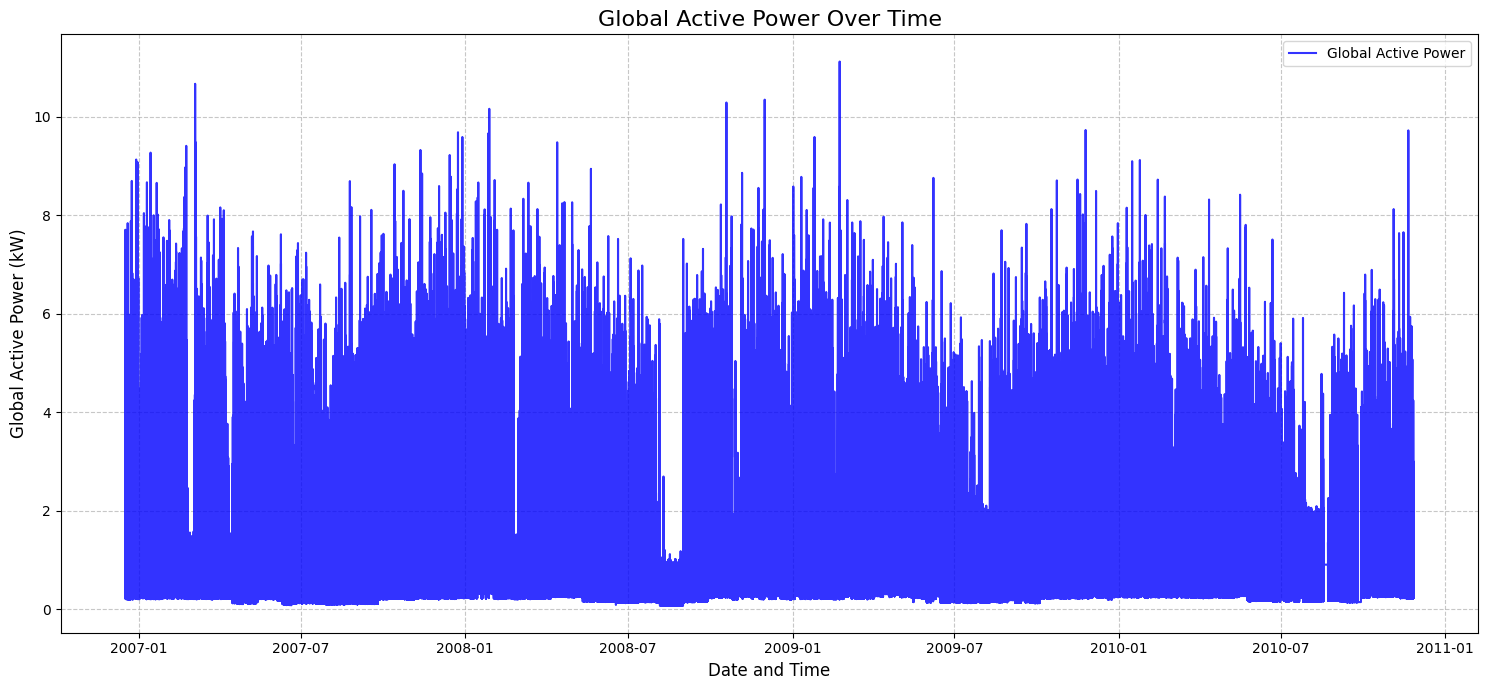

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power', color='blue', alpha=0.8)
plt.title('Global Active Power Over Time', fontsize=16)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek

avg_power_per_hour = df.groupby('Hour')['Global_active_power'].mean()
avg_power_per_day = df.groupby('DayOfWeek')['Global_active_power'].mean()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_power_per_day.index = avg_power_per_day.index.map(lambda x: day_names[x])

print(avg_power_per_hour.head())
print(avg_power_per_day.head())

Hour
0    0.659583
1    0.540739
2    0.482724
3    0.447379
4    0.446164
Name: Global_active_power, dtype: float64
DayOfWeek
Monday       0.992977
Tuesday      1.067148
Wednesday    1.084690
Thursday     0.981797
Friday       1.042727
Name: Global_active_power, dtype: float64


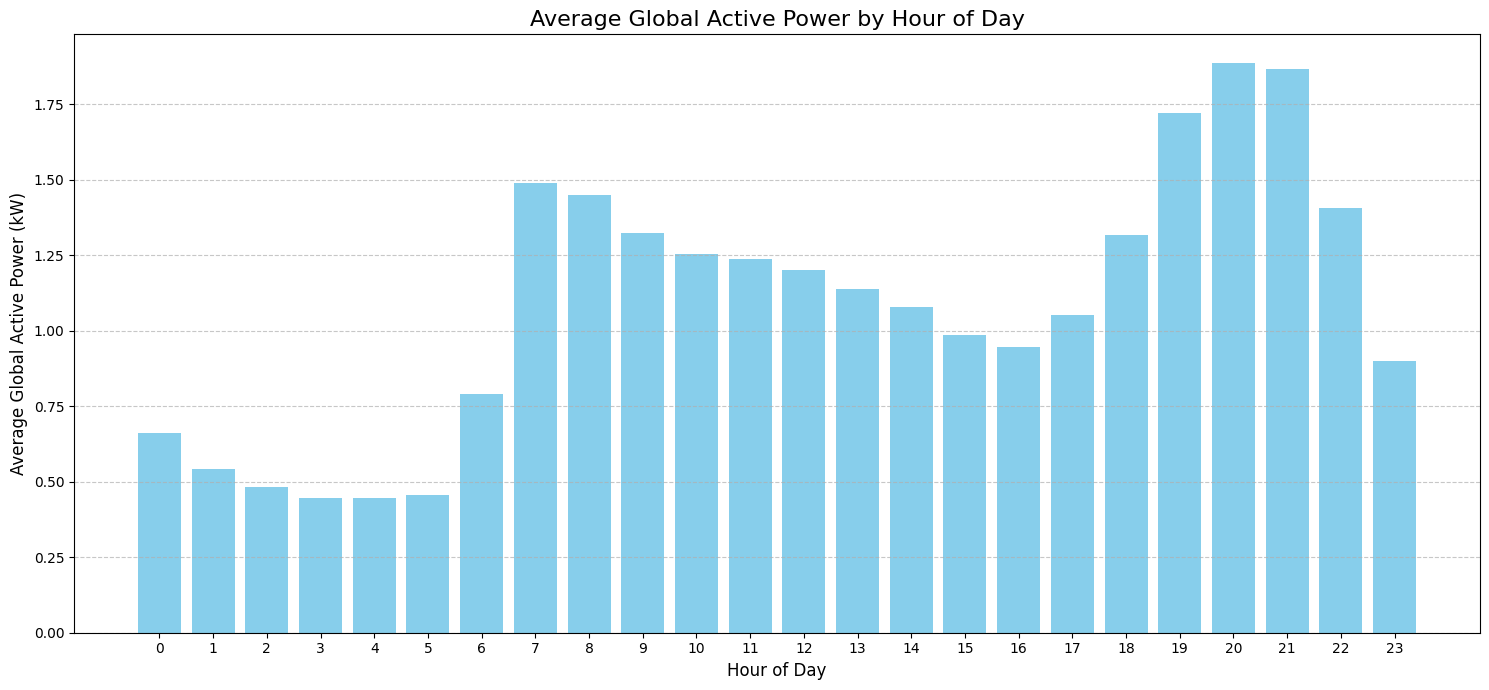

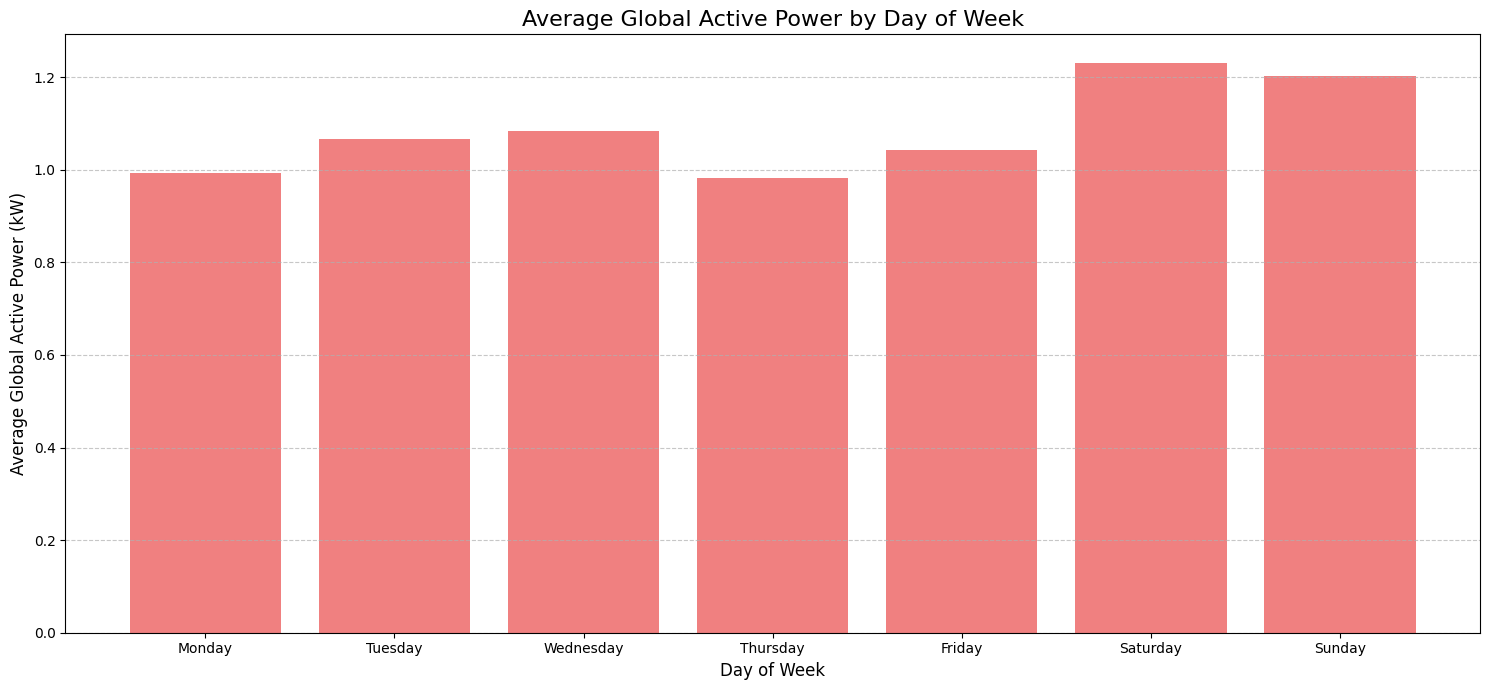

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.bar(avg_power_per_hour.index, avg_power_per_hour.values, color='skyblue')
plt.title('Average Global Active Power by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Global Active Power (kW)', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
plt.bar(avg_power_per_day.index, avg_power_per_day.values, color='lightcoral')
plt.title('Average Global Active Power by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Global Active Power (kW)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df_hourly = df['Global_active_power'].resample('H').mean().to_frame()

print(df_hourly.head())
df_hourly.info()

                     Global_active_power
DateTime                                
2006-12-16 17:00:00             4.222889
2006-12-16 18:00:00             3.632200
2006-12-16 19:00:00             3.400233
2006-12-16 20:00:00             3.268567
2006-12-16 21:00:00             3.056467
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: h
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_active_power  34589 non-null  float64
dtypes: float64(1)
memory usage: 540.5 KB


/tmp/ipython-input-1504414960.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean().to_frame()


In [ ]:
from sklearn.model_selection import train_test_split

df_hourly['Global_active_power_lag1'] = df_hourly['Global_active_power'].shift(1)
df_hourly.dropna(inplace=True)

print(df_hourly.head())

X = df_hourly[['Global_active_power_lag1']]
y = df_hourly['Global_active_power']

split_index = int(len(df_hourly) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

                     Global_active_power  Global_active_power_lag1
DateTime                                                          
2006-12-16 18:00:00             3.632200                  4.222889
2006-12-16 19:00:00             3.400233                  3.632200
2006-12-16 20:00:00             3.268567                  3.400233
2006-12-16 21:00:00             3.056467                  3.268567
2006-12-16 22:00:00             2.200133                  3.056467
Shape of X_train: (27670, 1)
Shape of X_test: (6918, 1)
Shape of y_train: (27670,)
Shape of y_test: (6918,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.4784
Root Mean Squared Error (RMSE): 0.6859


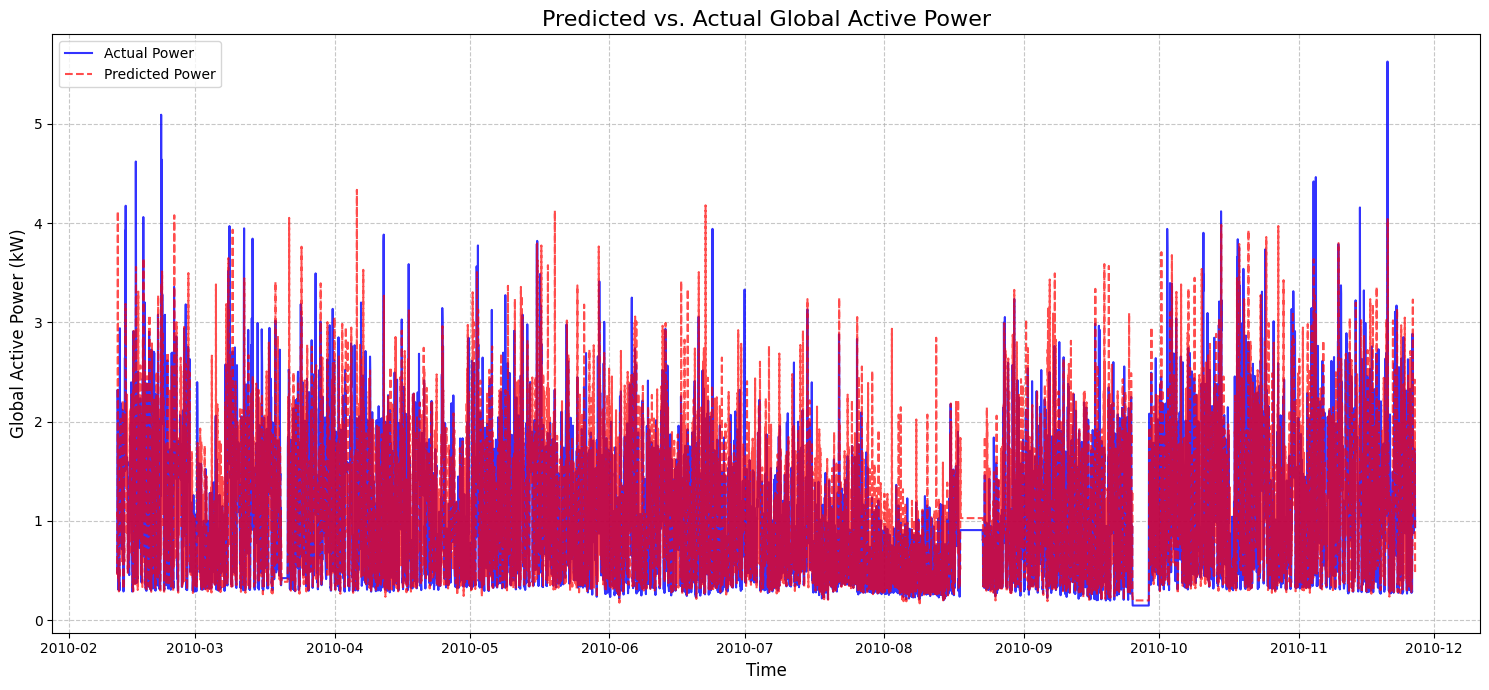

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual Power', color='blue', alpha=0.8)
plt.plot(y_test.index, y_pred, label='Predicted Power', color='red', alpha=0.7, linestyle='--')
plt.title('Predicted vs. Actual Global Active Power', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

model_if = IsolationForest(contamination='auto', random_state=42)
model_if.fit(df_hourly[['Global_active_power']])
df_hourly['anomaly'] = model_if.predict(df_hourly[['Global_active_power']])
anomalies = df_hourly[df_hourly['anomaly'] == -1]

print(len(anomalies))
print(anomalies.head())

7255
                     Global_active_power  Global_active_power_lag1  anomaly
DateTime                                                                   
2006-12-16 18:00:00             3.632200                  4.222889       -1
2006-12-16 19:00:00             3.400233                  3.632200       -1
2006-12-16 20:00:00             3.268567                  3.400233       -1
2006-12-16 21:00:00             3.056467                  3.268567       -1
2006-12-16 22:00:00             2.200133                  3.056467       -1


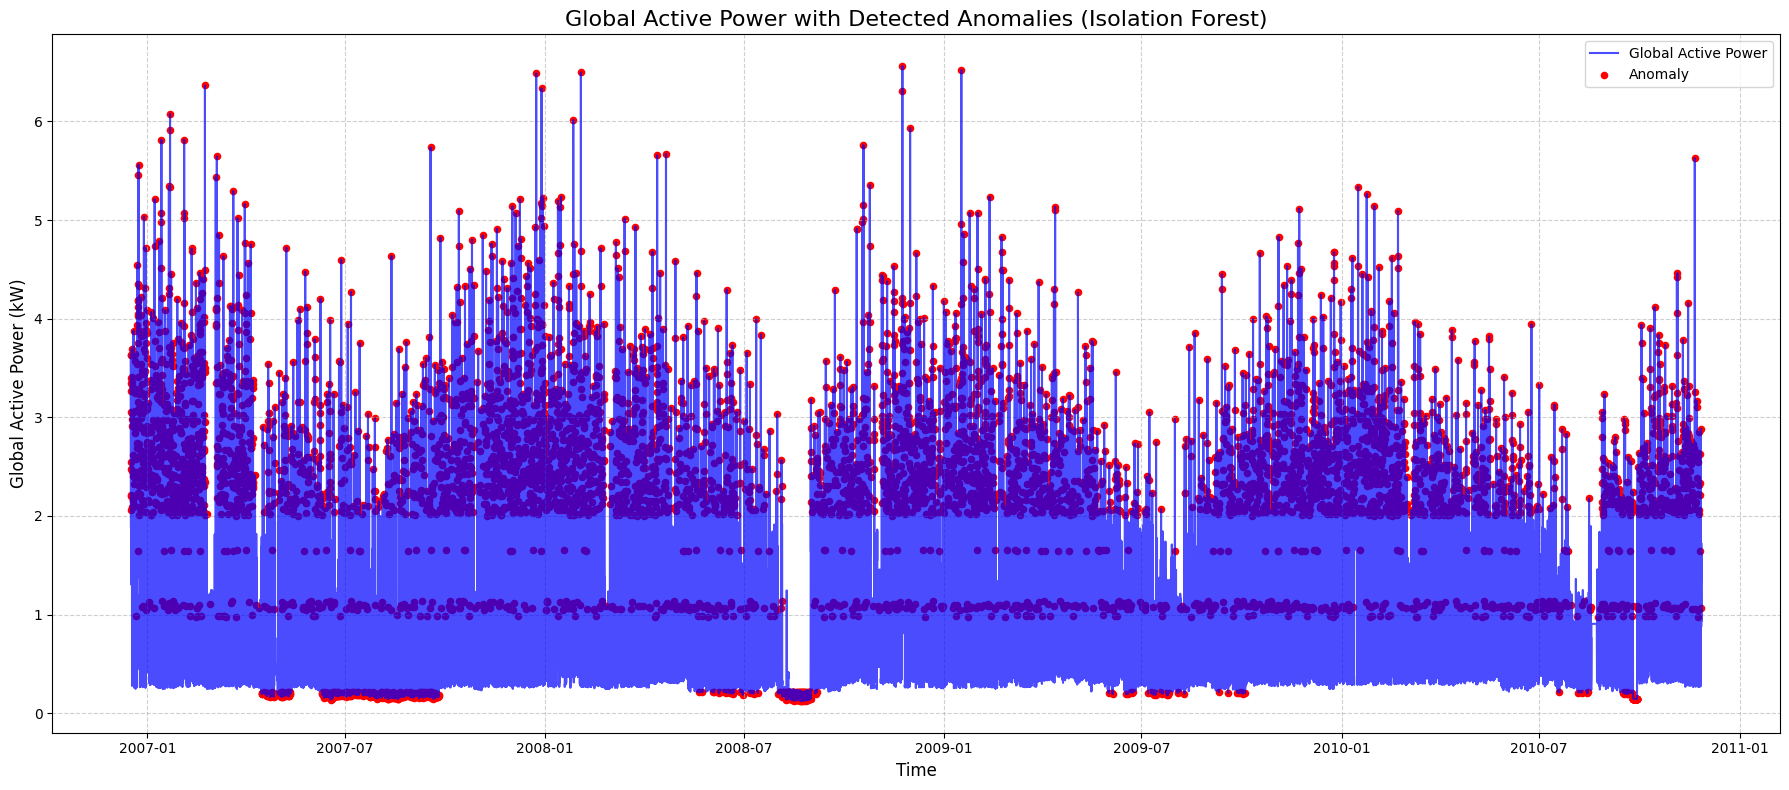

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(df_hourly.index, df_hourly['Global_active_power'], label='Global Active Power', color='blue', alpha=0.7)
plt.scatter(anomalies.index, anomalies['Global_active_power'], color='red', label='Anomaly', marker='o', s=20)
plt.title('Global Active Power with Detected Anomalies (Isolation Forest)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

df_daily_power = df['Global_active_power'].resample('D').sum().to_frame()
df_daily_power.dropna(inplace=True)

print(df_daily_power.head())
df_daily_power.info()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_daily_power[['Global_active_power']])
df_daily_power['cluster_label'] = kmeans.labels_

print(df_daily_power.head())
print(df_daily_power['cluster_label'].value_counts())

            Global_active_power
DateTime                       
2006-12-16             1209.176
2006-12-17             3390.460
2006-12-18             2203.826
2006-12-19             1666.194
2006-12-20             2225.748
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_active_power  1442 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB
            Global_active_power  cluster_label
DateTime                                      
2006-12-16             1209.176              1
2006-12-17             3390.460              2
2006-12-18             2203.826              2
2006-12-19             1666.194              0
2006-12-20             2225.748              2
cluster_label
0    713
1    507
2    222
Name: count, dtype: int64


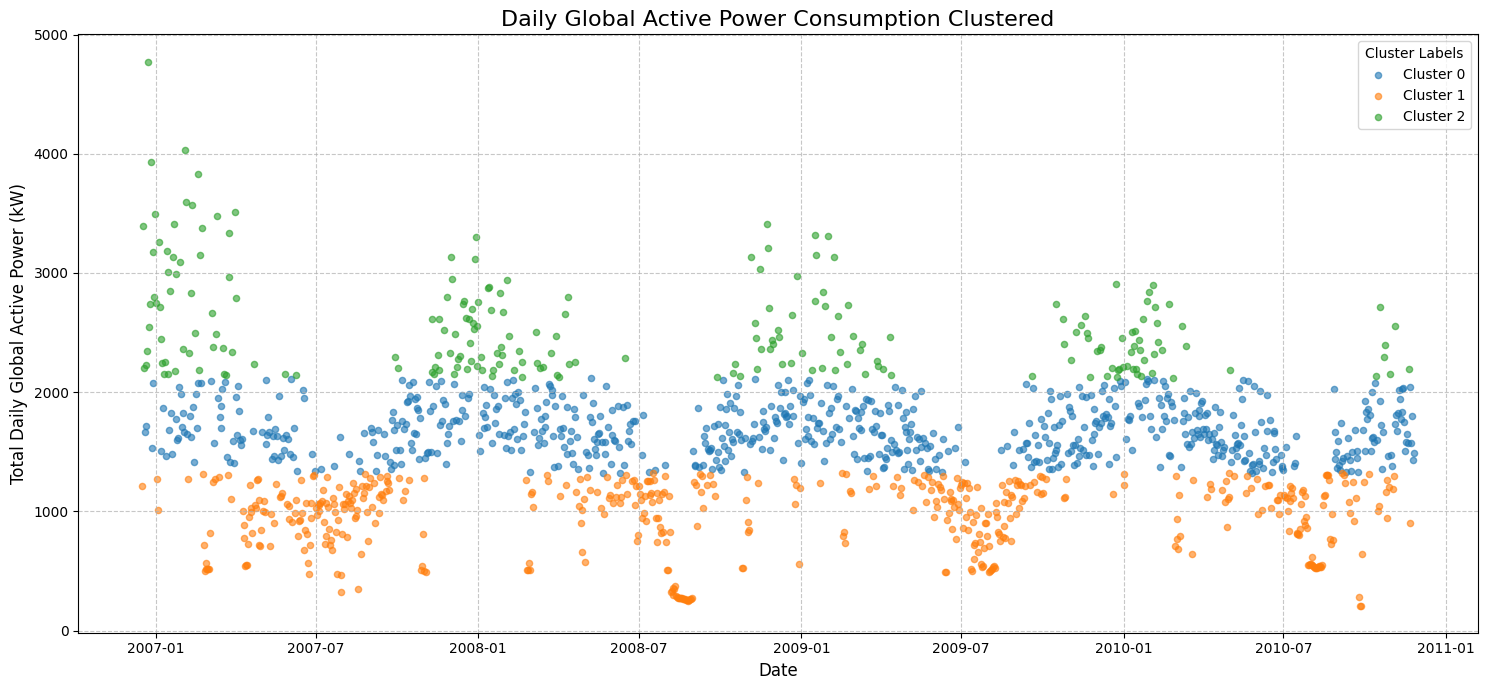

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

for cluster_id in sorted(df_daily_power['cluster_label'].unique()):
    cluster_data = df_daily_power[df_daily_power['cluster_label'] == cluster_id]
    plt.scatter(cluster_data.index, cluster_data['Global_active_power'],
                label=f'Cluster {cluster_id}', s=20, alpha=0.6)

plt.title('Daily Global Active Power Consumption Clustered', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Daily Global Active Power (kW)', fontsize=12)
plt.legend(title='Cluster Labels')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(df_daily_power.groupby('cluster_label')['Global_active_power'].mean())

cluster_label
0    1684.350696
1     961.067909
2    2548.996270
Name: Global_active_power, dtype: float64


In [ ]:
import numpy as np
import pandas as pd

threshold_low_medium = np.percentile(df_hourly['Global_active_power'], 33)
threshold_medium_high = np.percentile(df_hourly['Global_active_power'], 66)

print(f"Threshold for Low/Medium Usage: {threshold_low_medium:.4f} kW")
print(f"Threshold for Medium/High Usage: {threshold_medium_high:.4f} kW")

def categorize_power(power_value):
    if power_value < threshold_low_medium:
        return 'Low Usage'
    elif power_value < threshold_medium_high:
        return 'Medium Usage'
    else:
        return 'High Usage'

predicted_categories = pd.Series(y_pred, index=y_test.index).apply(categorize_power)

print(predicted_categories.head(10))
print(predicted_categories.value_counts())

Threshold for Low/Medium Usage: 0.4013 kW
Threshold for Medium/High Usage: 1.3645 kW
DateTime
2010-02-11 16:00:00    Medium Usage
2010-02-11 17:00:00    Medium Usage
2010-02-11 18:00:00    Medium Usage
2010-02-11 19:00:00    Medium Usage
2010-02-11 20:00:00      High Usage
2010-02-11 21:00:00      High Usage
2010-02-11 22:00:00      High Usage
2010-02-11 23:00:00    Medium Usage
2010-02-12 00:00:00    Medium Usage
2010-02-12 01:00:00       Low Usage
Freq: h, dtype: object
Medium Usage    3622
High Usage      2048
Low Usage       1248
Name: count, dtype: int64


In [ ]:
import pandas as pd

def generate_suggestion(category):
    if category == 'Low Usage':
        return 'Keep up the good work! Your energy consumption is efficient.'
    elif category == 'Medium Usage':
        return 'Consider adopting more energy-saving practices to reduce consumption.'
    elif category == 'High Usage':
        return 'Review your usage of high-power appliances and identify areas for reduction.'
    else:
        return 'Unknown category.'

predicted_suggestions = predicted_categories.apply(generate_suggestion)

print(predicted_suggestions.head(10))
print(predicted_suggestions.value_counts())

DateTime
2010-02-11 16:00:00    Consider adopting more energy-saving practices...
2010-02-11 17:00:00    Consider adopting more energy-saving practices...
2010-02-11 18:00:00    Consider adopting more energy-saving practices...
2010-02-11 19:00:00    Consider adopting more energy-saving practices...
2010-02-11 20:00:00    Review your usage of high-power appliances and...
2010-02-11 21:00:00    Review your usage of high-power appliances and...
2010-02-11 22:00:00    Review your usage of high-power appliances and...
2010-02-11 23:00:00    Consider adopting more energy-saving practices...
2010-02-12 00:00:00    Consider adopting more energy-saving practices...
2010-02-12 01:00:00    Keep up the good work! Your energy consumption...
Freq: h, dtype: object
Consider adopting more energy-saving practices to reduce consumption.           3622
Review your usage of high-power appliances and identify areas for reduction.    2048
Keep up the good work! Your energy consumption is efficient.        

In [ ]:
import pandas as pd

y_pred_series = pd.Series(y_pred, index=y_test.index)

example_indices = [
    y_test.index[0],
    y_test.index[len(y_test) // 2],
    y_test.index[-1]
]

for dt_index in example_indices:
    predicted_power = y_pred_series.loc[dt_index]
    category = predicted_categories.loc[dt_index]
    suggestion = predicted_suggestions.loc[dt_index]

    print(f"Date/Time: {dt_index.strftime('%Y-%m-%d %H:%M')}")
    print(f"Predicted Power: {predicted_power:.4f} kW")
    print(f"Consumption Category: {category}")
    print(f"Suggestion: {suggestion}")

Date/Time: 2010-02-11 16:00
Predicted Power: 0.4556 kW
Consumption Category: Medium Usage
Suggestion: Consider adopting more energy-saving practices to reduce consumption.
Date/Time: 2010-07-05 19:00
Predicted Power: 0.5813 kW
Consumption Category: Medium Usage
Suggestion: Consider adopting more energy-saving practices to reduce consumption.
Date/Time: 2010-11-26 21:00
Predicted Power: 0.4530 kW
Consumption Category: Medium Usage
Suggestion: Consider adopting more energy-saving practices to reduce consumption.
